In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install pydrive
!pip install oauth2client
!pip install xgboost lightgbm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
import joblib
import shap
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler,label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Importation des bibliothèques
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials






# Remplacez par le lien partagé de Google Drive
drive_link = "https://drive.google.com/file/d/17hvLnQJXuhww5CY410D_feBhFsKwy-U-/view?usp=sharing"

# Convertir le lien en lien téléchargeable
file_id = drive_link.split("/d/")[1].split("/view")[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Télécharger le fichier CSV
output_file = "data.csv"
gdown.download(download_url, output_file, quiet=False)

# Charger le fichier CSV avec Pandas
data = pd.read_csv(output_file)

# Afficher les premières lignes
print("Aperçu des données :")
print(data.head())


Downloading...
From: https://drive.google.com/uc?id=17hvLnQJXuhww5CY410D_feBhFsKwy-U-
To: /content/data.csv
100%|██████████| 79.3k/79.3k [00:00<00:00, 61.4MB/s]

Aperçu des données :
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             n

In [ ]:
#Aperçu général
# Dimensions du jeu de données
print(f"Dimensions : {data.shape}")

# Résumé des colonnes et types de données
print("Résumé des colonnes :")
data.info()

# Résumé statistique
print("Résumé statistique :")
data.describe()


Dimensions : (920, 16)
Résumé des colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
Résumé statistique :


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
#Vérification des valeurs manquantes
print("Valeurs manquantes :")
print(data.isnull().sum())

Valeurs manquantes :
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


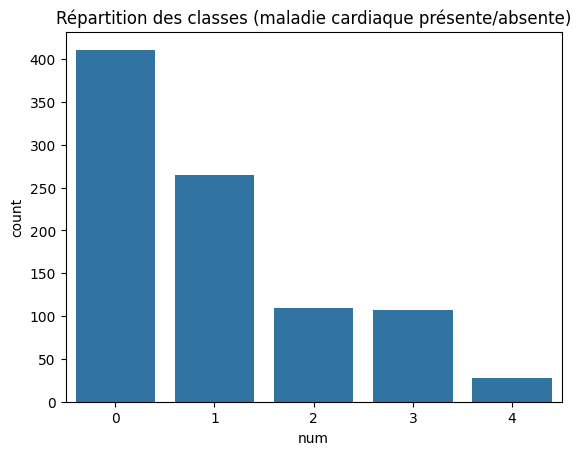

In [ ]:
#Distribution des classes
# 'target' est souvent la colonne représentant la présence de maladies cardiaques
sns.countplot(x=data['num'], data=data)
plt.title("Répartition des classes (maladie cardiaque présente/absente)")
plt.show()


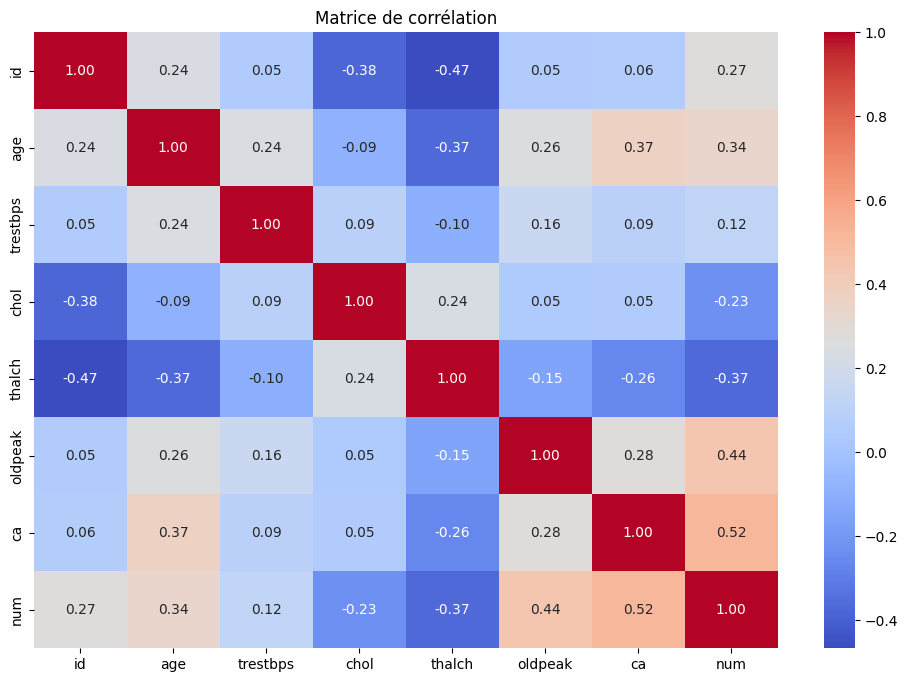

In [ ]:
# Corrélations entre les variables
# Sélectionner uniquement les colonnes numériques
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Afficher la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()


In [ ]:
#Étape 4 : Nettoyage des Données
#Suppression des doublons
# Vérifier et supprimer les doublons
print(f"Taille initiale : {data.shape}")
print(f"Doublons avant : {data.duplicated().sum()}")
data = data.drop_duplicates()
print(f"Doublons après : {data.duplicated().sum()}")


Taille initiale : (920, 16)
Doublons avant : 0
Doublons après : 0


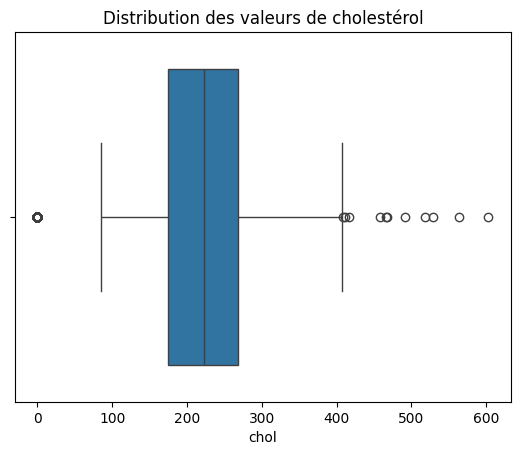

In [ ]:
#Gérer les valeurs aberrantes (si détectées)
# Visualisation des valeurs aberrantes pour certaines colonnes
sns.boxplot(x=data['chol'])  # Exemple pour le cholestérol
plt.title("Distribution des valeurs de cholestérol")
plt.show()

# Suppression des valeurs aberrantes (exemple pour cholestérol < 600)
data = data[data['chol'] < 600]


In [ ]:
#Encodage des variables catégoriques (si présent)
# Exemple : Si des colonnes catégoriques existent
# data['column_name'] = data['column_name'].astype('category').cat.codes

#Étape 5 : Préparation pour la Modélisation
#Séparation des caractéristiques et de la cible
X = data.drop('num', axis=1)  # Caractéristiques
y = data['num']              # Cible


In [ ]:
#Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Taille des ensembles :")
print(f"Entraînement : {X_train.shape}, Test : {X_test.shape}")


Taille des ensembles :
Entraînement : (711, 15), Test : (178, 15)


In [ ]:
#Normalisation des données
# Étape 1 : Encoder les variables catégorielles
label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':  # Vérifier si la colonne est catégorielle
        X[col] = label_encoder.fit_transform(X[col])

# Étape 2 : Diviser les données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Étape 6 : Enregistrement et Préparation pour la Modélisation
# Sauvegarder les ensembles traités
pd.DataFrame(X_train).to_csv('X_train.csv', index=False)
pd.DataFrame(X_test).to_csv('X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

Entraînement et Évaluation

In [ ]:
# Remplir les NaN avec la moyenne pour les colonnes numériques
imputer = SimpleImputer(strategy='mean')

# Appliquer l'imputation sur X_train et X_test

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Vérifier que toutes les valeurs NaN sont traitées
print(f"NaN dans X_train après traitement : {np.isnan(X_train).sum()}")
print(f"NaN dans X_test après traitement : {np.isnan(X_test).sum()}")


NaN dans X_train après traitement : 0
NaN dans X_test après traitement : 0


Performance de la Régression Logistique :
Accuracy : 0.55
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        77
           1       0.48      0.51      0.50        55
           2       0.30      0.13      0.18        23
           3       0.24      0.24      0.24        17
           4       0.00      0.00      0.00         6

    accuracy                           0.55       178
   macro avg       0.34      0.34      0.33       178
weighted avg       0.50      0.55      0.52       178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


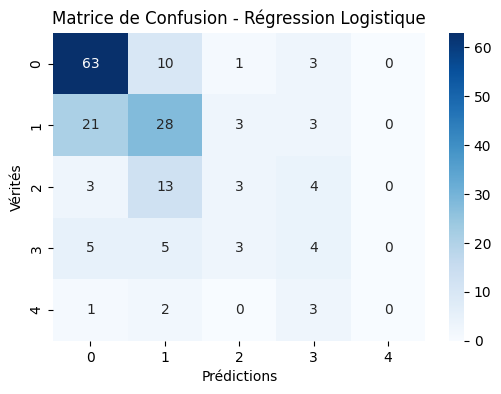

In [ ]:
# Entraînement et Évaluation
# Régression Logistique
# Modèle de régression logistique
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Prédiction
y_pred_log = log_model.predict(X_test)

# Évaluation
print("Performance de la Régression Logistique :")
print(f"Accuracy : {accuracy_score(y_test, y_pred_log):.2f}")
print(classification_report(y_test, y_pred_log))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion - Régression Logistique")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Performance de l'Arbre de Décision :
Accuracy : 0.61
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        77
           1       0.59      0.60      0.59        55
           2       0.33      0.39      0.36        23
           3       0.14      0.06      0.08        17
           4       0.00      0.00      0.00         6

    accuracy                           0.61       178
   macro avg       0.36      0.38      0.37       178
weighted avg       0.56      0.61      0.58       178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


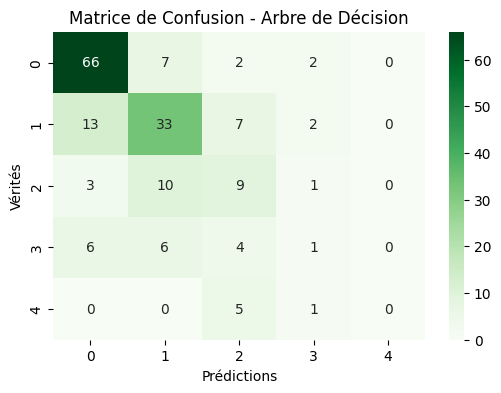

In [ ]:
# Modèle de l'Arbre de Décision
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
tree_model.fit(X_train, y_train)

# Prédiction
y_pred_tree = tree_model.predict(X_test)

# Évaluation
print("Performance de l'Arbre de Décision :")
print(f"Accuracy : {accuracy_score(y_test, y_pred_tree):.2f}")
print(classification_report(y_test, y_pred_tree))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Greens')
plt.title("Matrice de Confusion - Arbre de Décision")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()


Performance de la Forêt Aléatoire :
Accuracy : 0.61
              precision    recall  f1-score   support

           0       0.74      0.83      0.79        77
           1       0.59      0.64      0.61        55
           2       0.38      0.35      0.36        23
           3       0.17      0.12      0.14        17
           4       0.00      0.00      0.00         6

    accuracy                           0.61       178
   macro avg       0.38      0.39      0.38       178
weighted avg       0.57      0.61      0.59       178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


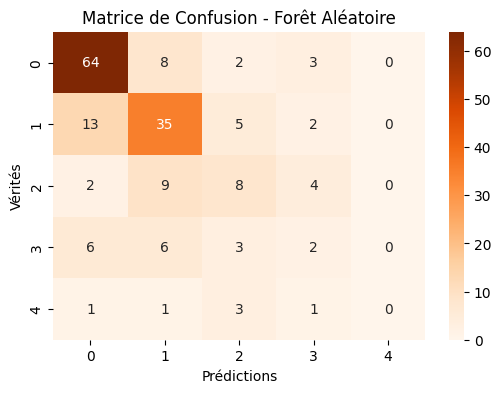

In [ ]:
# Modèle de la Forêt Aléatoire
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf_model.predict(X_test)

# Évaluation
print("Performance de la Forêt Aléatoire :")
print(f"Accuracy : {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Oranges')
plt.title("Matrice de Confusion - RandomForest ")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:33:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance de XGBoost :
Accuracy : 0.60
              precision    recall  f1-score   support

           0       0.77      0.81      0.78        77
           1       0.58      0.56      0.57        55
           2       0.36      0.43      0.39        23
           3       0.23      0.18      0.20        17
           4       0.00      0.00      0.00         6

    accuracy                           0.60       178
   macro avg       0.39      0.40      0.39       178
weighted avg       0.58      0.60      0.59       178



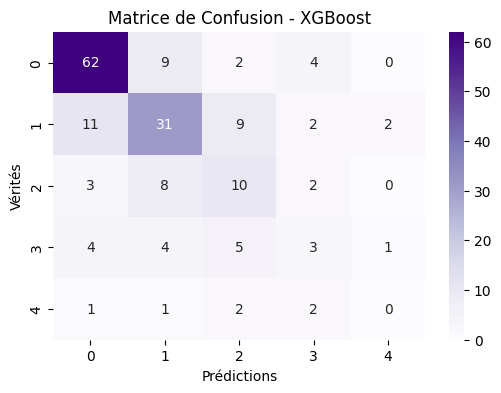

In [ ]:
# Modèle XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Prédiction
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print("Performance de XGBoost :")
print(f"Accuracy : {accuracy_score(y_test, y_pred_xgb):.2f}")
print(classification_report(y_test, y_pred_xgb))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Purples')
plt.title("Matrice de Confusion - XGBoost")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

Performance de LightGBM :
Accuracy : 0.60
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        77
           1       0.57      0.58      0.58        55
           2       0.40      0.43      0.42        23
           3       0.20      0.18      0.19        17
           4       0.00      0.00      0.00         6

    accuracy                           0.60       178
   macro avg       0.39      0.40      0.39       178
weighted avg       0.57      0.60      0.59       178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


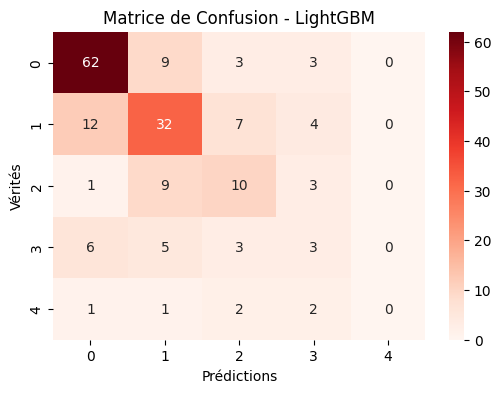

In [ ]:
# Modèle LightGBM
lgbm_model = LGBMClassifier(random_state=42,verbose=-1)

lgbm_model.fit(X_train, y_train)

# Prédiction
y_pred_lgbm = lgbm_model.predict(X_test,)

# Évaluation
print("Performance de LightGBM :")
print(f"Accuracy : {accuracy_score(y_test, y_pred_lgbm):.2f}")
print(classification_report(y_test, y_pred_lgbm))

# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt='d', cmap='Reds')
plt.title("Matrice de Confusion - LightGBM")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()


Résumé des performances des modèles :
Logistic Regression: 0.55
Decision Tree: 0.61
Random Forest: 0.61
XGBoost: 0.60
LightGBM: 0.60


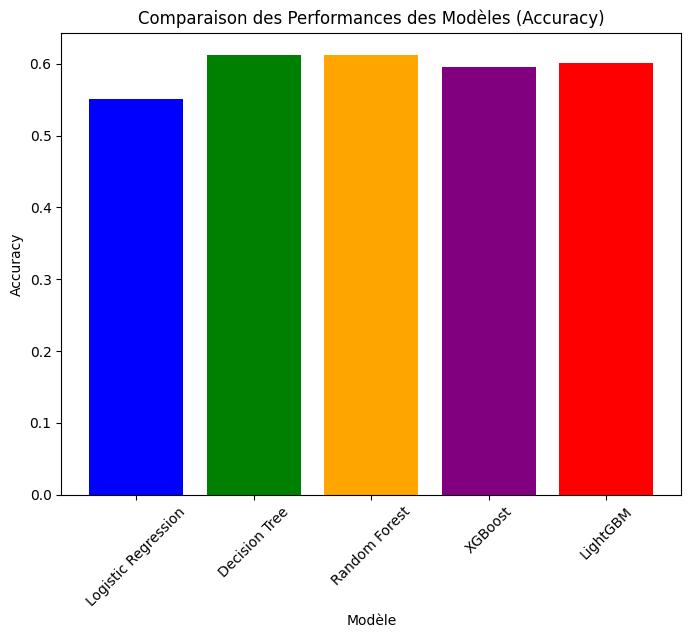

In [ ]:
# Comparaison des scores
models = {
    "Logistic Regression": accuracy_score(y_test, y_pred_log),
    "Decision Tree": accuracy_score(y_test, y_pred_tree),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "LightGBM": accuracy_score(y_test, y_pred_lgbm)
}

# Comparer les résultats
print("\nRésumé des performances des modèles :")
for model_name, acc in models.items():
    print(f"{model_name}: {acc:.2f}")

# Visualisation des performances
plt.figure(figsize=(8, 6))
plt.bar(models.keys(), models.values(), color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title("Comparaison des Performances des Modèles (Accuracy)")
plt.xlabel("Modèle")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Métriques détaillées

print("Métriques détaillées pour la Forêt Aléatoire :")
print(f"Précision : {precision_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"Rappel : {recall_score(y_test, y_pred_rf, average='weighted'):.2f}")
print(f"F1-Score : {f1_score(y_test, y_pred_rf, average='weighted'):.2f}")


Métriques détaillées pour la Forêt Aléatoire :
Précision : 0.57
Rappel : 0.61
F1-Score : 0.59


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:


# Binarisation des étiquettes pour calcul multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
y_proba = rf_model.predict_proba(X_test)

# AUC
auc_score = roc_auc_score(y_test_bin, y_proba, multi_class='ovr')
print(f"AUC Score : {auc_score:.2f}")


AUC Score : 0.82


In [ ]:
# Importance des caractéristiques
feature_importances = rf_model.feature_importances_
features = pd.DataFrame({'Caractéristique': X.columns, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
print(features)

   Caractéristique  Importance
0               id    0.215516
9           thalch    0.089674
1              age    0.089052
4               cp    0.076418
11         oldpeak    0.076142
6             chol    0.075561
5         trestbps    0.073095
3          dataset    0.059921
10           exang    0.046588
12           slope    0.043983
13              ca    0.043094
14            thal    0.041024
8          restecg    0.027381
2              sex    0.021725
7              fbs    0.020824


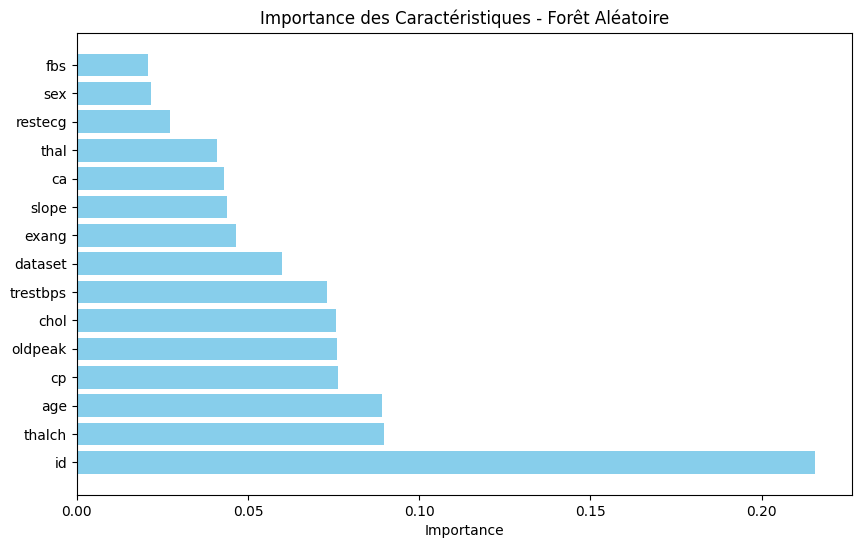

In [ ]:
# Graphique des importances
#Nous avons identifié les facteurs clés influençant la prédiction, comme le cholestérol et la fréquence cardiaque.
plt.figure(figsize=(10, 6))
plt.barh(features['Caractéristique'], features['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Importance des Caractéristiques - Random Forest")
plt.show()

In [ ]:
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Scores de validation croisée : {scores}")
print(f"Moyenne des scores : {scores.mean():.2f}")

Scores de validation croisée : [0.48876404 0.46067416 0.7247191  0.4494382  0.17514124]
Moyenne des scores : 0.46


In [ ]:
# Identifier les erreurs

errors = X_test[y_test != y_pred_rf]
error_labels = y_test[y_test != y_pred_rf]
print("Échantillons mal prédits :", errors)

Échantillons mal prédits : [[ 1.38664711e+00  1.47326608e-01  5.12715752e-01 ...  1.21725989e+00
   7.28015098e-17  8.60363297e-01]
 [ 1.50653552e+00  2.29162996e+00  5.12715752e-01 ... -1.85178898e+00
   7.28015098e-17 -1.90699081e-01]
 [ 1.33419593e+00  6.83402446e-01  5.12715752e-01 ...  1.21725989e+00
   7.28015098e-17  8.60363297e-01]
 ...
 [-1.35205378e+00  6.83402446e-01 -1.95039843e+00 ... -8.28772689e-01
   1.37390946e+00 -1.90699081e-01]
 [ 1.57397276e+00  1.64833895e+00  5.12715752e-01 ...  1.21725989e+00
   7.28015098e-17  8.60363297e-01]
 [ 1.39788665e+00  7.90617613e-01  5.12715752e-01 ...  1.21725989e+00
   7.28015098e-17  8.60363297e-01]]


In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Meilleurs paramètres : {grid_search.best_params_}")


Meilleurs paramètres : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:


print("Rapport de classification détaillé :")
print(classification_report(y_test, rf_model.predict(X_test)))


Rapport de classification détaillé :
              precision    recall  f1-score   support

           0       0.74      0.83      0.79        77
           1       0.59      0.64      0.61        55
           2       0.38      0.35      0.36        23
           3       0.17      0.12      0.14        17
           4       0.00      0.00      0.00         6

    accuracy                           0.61       178
   macro avg       0.38      0.39      0.38       178
weighted avg       0.57      0.61      0.59       178



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

# Créer un DataFrame pour une analyse simple
X_test_df = pd.DataFrame(X_test)
X_test_df['True_Label'] = y_test
X_test_df['Predicted_Label'] = rf_model.predict(X_test)

# Filtrer les échantillons mal classifiés
misclassified_samples = X_test_df[X_test_df['True_Label'] != X_test_df['Predicted_Label']]

# Moyenne des caractéristiques des échantillons mal classifiés
print(misclassified_samples.mean())


0                  0.013630
1                 -0.012521
2                 -0.039619
3                  0.016049
4                  0.058226
5                  0.006265
6                  0.057470
7                  0.066147
8                  0.008633
9                  0.130524
10                -0.014541
11                 0.033859
12                -0.047560
13                -0.022586
14                 0.064104
True_Label         1.500000
Predicted_Label    0.806061
dtype: float64


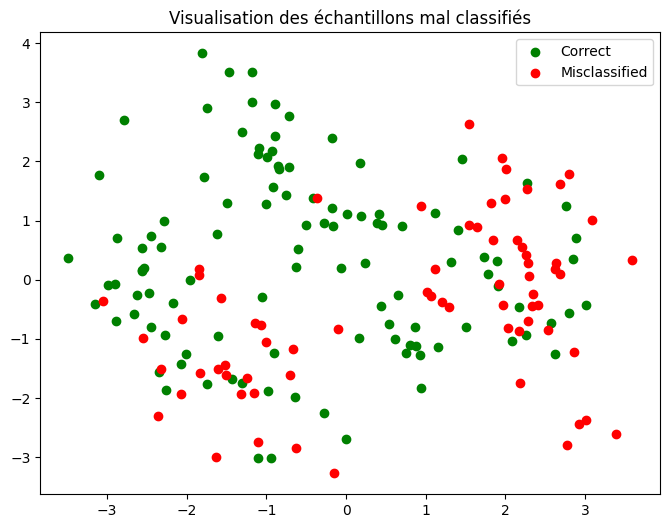

In [ ]:

# PCA pour réduire à 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Identifier les indices mal classifiés
misclassified_indices = (y_test != rf_model.predict(X_test))

# Visualisation
#Les échantillons mal classifiés ont été examinés pour comprendre les limites des modèles.
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[~misclassified_indices, 0], X_pca[~misclassified_indices, 1], c='green', label='Correct')
plt.scatter(X_pca[misclassified_indices, 0], X_pca[misclassified_indices, 1], c='red', label='Misclassified')
plt.legend()
plt.title("Visualisation des échantillons mal classifiés")
plt.show()


In [ ]:
# Sauvegarder les modèle
joblib.dump(rf_model, 'heart_disease_rf_model.pkl')
joblib.dump(xgb_model, 'heart_disease_xgb_model.pkl')
joblib.dump(lgbm_model, 'heart_disease_lgbm_model.pkl')


print("Le modèle le plus performant a été sauvegardé sous 'heart_disease_rf_model.pkl'.")
print("Le modèle le plus performant a été sauvegardé sous 'heart_disease_xgb_model.pkl'.")
print("Le modèle le plus performant a été sauvegardé sous 'heart_disease_lgbm_model.pkl'.")

Le modèle le plus performant a été sauvegardé sous 'heart_disease_rf_model.pkl'.
Le modèle le plus performant a été sauvegardé sous 'heart_disease_xgb_model.pkl'.
Le modèle le plus performant a été sauvegardé sous 'heart_disease_lgbm_model.pkl'.
